In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the XOR Dataset
		according to the tensorflow playground website
	

In [3]:
def custom_xor(x,y):
    if x*y >= 0:
        return 1
    else:
        return -1
def pad_data(x):
    p = 0.3
    if x>0:
        return x+p
    else:
        return x-p
def rand_uniform(a,b):
    r = np.random.rand()
    r = r*(b-a)+a
    return r
def generate_xor_dataset(numsamples,noise=0):
    data = []
    padding = 0.3
    for i in range(numsamples):
        x = rand_uniform(-5,5)
        y = rand_uniform(-5,5)
        x = pad_data(x)
        y = pad_data(y)
        noiseX = rand_uniform(-5,5)*noise
        noiseY = rand_uniform(-5,5)*noise
        # x,y = x+noiseX,y+noiseY
        label = custom_xor(x+noiseX,y+noiseY)
        data.append([x,y,label])
    # data = np.array(data)
    return data
        

In [4]:
data_0 = generate_xor_dataset(400)

In [5]:
def plot_data(data):#Function to plot data with 2 features and 2 labels
	data = np.array(data)
	X = data[:,:2]
	y = data[:,2]
	colors = ['blue' if label == 1 else 'orange' for label in y]
	plt.scatter(X[:,0],X[:,1], c = colors,marker='.')
	plt.axhline(0, color='gray', linewidth=1, linestyle='-')  # X-axis line at y=0
	plt.axvline(0, color='gray', linewidth=1, linestyle='-')  # Y-axis line at x=0
	plt.show()

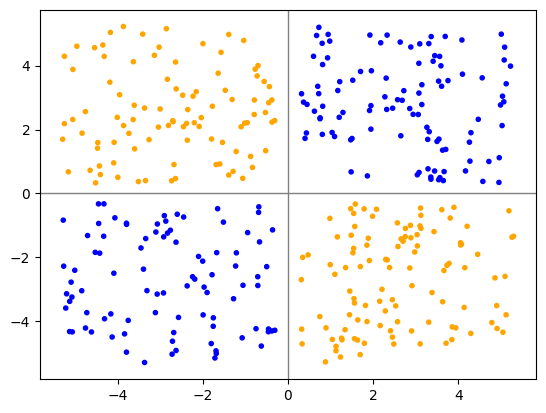

In [6]:
plot_data(data_0)

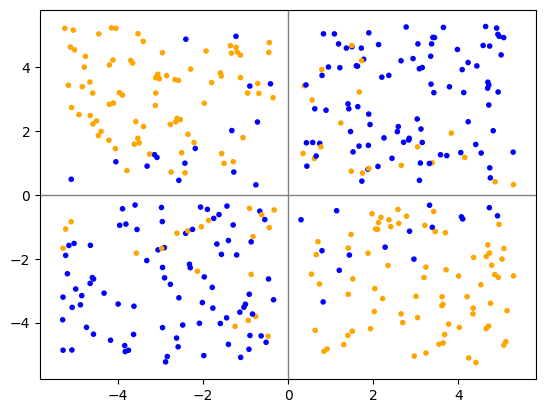

In [7]:
data_05 = generate_xor_dataset(400,0.5)
plot_data(data_05)

In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [9]:
# Data Generation
data = generate_xor_dataset(400)  # 200 train + 200 test
data = np.array(data)
X, y = data[:, :2], data[:, 2]
y = (y > 0).astype(int)  # Convert labels to binary (1 for positive, 0 for negative)

# Split data into training, validation, and test sets manually
def split_data(X, y, train_size=0.6, val_size=0.2):
    total_samples = len(X)
    train_end = int(train_size * total_samples)
    val_end = int((train_size + val_size) * total_samples)

    X_train, y_train = torch.tensor(X[:train_end], dtype=torch.float32), torch.tensor(y[:train_end], dtype=torch.float32)
    X_val, y_val = torch.tensor(X[train_end:val_end], dtype=torch.float32), torch.tensor(y[train_end:val_end], dtype=torch.float32)
    X_test, y_test = torch.tensor(X[val_end:], dtype=torch.float32), torch.tensor(y[val_end:], dtype=torch.float32)

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Define MLP Model with optional L1 and L2 regularization
class MLP(nn.Module):
    def __init__(self, l1=0, l2=0):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.l1 = l1
        self.l2 = l2

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

    def regularization_loss(self):
        l1_loss = self.l1 * (torch.norm(self.fc1.weight, 1) + torch.norm(self.fc2.weight, 1) + torch.norm(self.fc3.weight, 1))
        l2_loss = self.l2 * (torch.norm(self.fc1.weight, 2) + torch.norm(self.fc2.weight, 2) + torch.norm(self.fc3.weight, 2))
        return l1_loss + l2_loss

# Training function


In [10]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=50):
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.BCELoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train).squeeze()
        loss = criterion(output, y_train) + model.regularization_loss()
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            model.eval()
            val_output = model(X_val).squeeze()
            val_loss = criterion(val_output, y_val)
            print(f'Epoch {epoch}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')



Epoch 0, Loss: 0.718590497970581, Val Loss: 0.6992397308349609
Epoch 10, Loss: 0.5868418216705322, Val Loss: 0.5621147155761719
Epoch 20, Loss: 0.42610830068588257, Val Loss: 0.3923109471797943
Epoch 30, Loss: 0.24019862711429596, Val Loss: 0.20887160301208496
Epoch 40, Loss: 0.11490777134895325, Val Loss: 0.09613367170095444


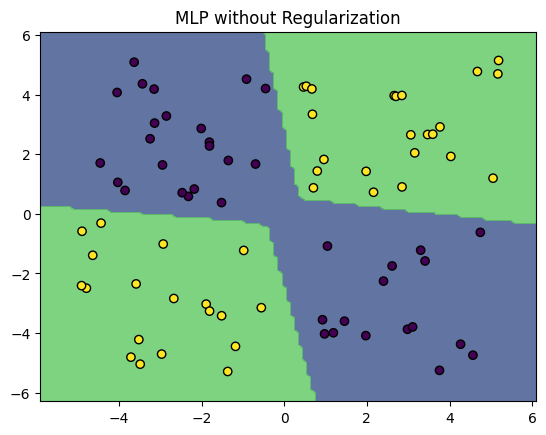

In [11]:
# MLP without Regularization
model_mlp = MLP()
train_model(model_mlp, X_train, y_train, X_val, y_val)
plot_decision_boundary(lambda x: model_mlp(x).squeeze() > 0.5, X_test, y_test, "MLP without Regularization")


Epoch 0, Loss: 0.9448103904724121, Val Loss: 0.6781066656112671
Epoch 10, Loss: 0.7493408918380737, Val Loss: 0.539068341255188
Epoch 20, Loss: 0.6078851222991943, Val Loss: 0.42621350288391113
Epoch 30, Loss: 0.49773645401000977, Val Loss: 0.30960577726364136
Epoch 40, Loss: 0.4051816761493683, Val Loss: 0.2010529786348343


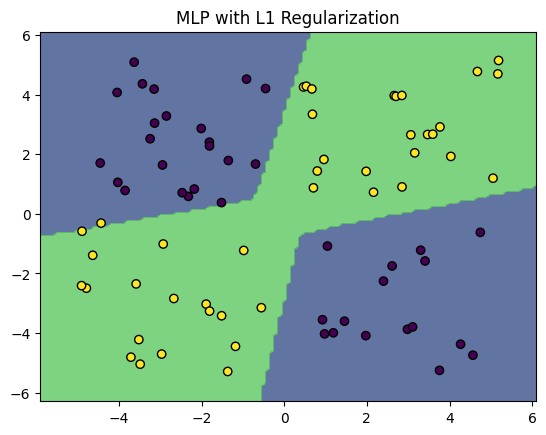

In [12]:
# MLP with L1 Regularization
best_l1_penalty = 0.01  # Adjust based on experimentation
model_l1 = MLP(l1=best_l1_penalty)
train_model(model_l1, X_train, y_train, X_val, y_val)
plot_decision_boundary(lambda x: model_l1(x).squeeze() > 0.5, X_test, y_test, "MLP with L1 Regularization")



Epoch 0, Loss: 0.7234930396080017, Val Loss: 0.6619898080825806
Epoch 10, Loss: 0.5308964848518372, Val Loss: 0.46707791090011597
Epoch 20, Loss: 0.32048043608665466, Val Loss: 0.2598842978477478
Epoch 30, Loss: 0.17425663769245148, Val Loss: 0.11521049588918686
Epoch 40, Loss: 0.12112830579280853, Val Loss: 0.05382859706878662


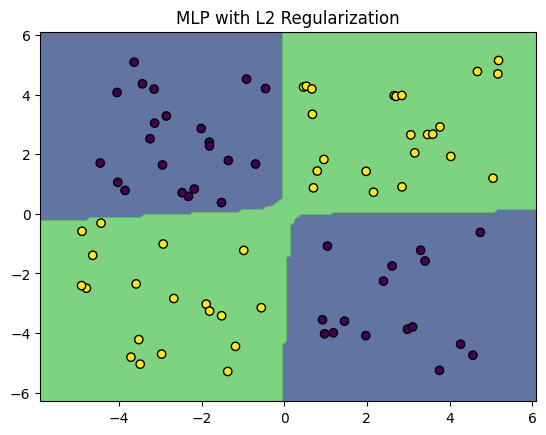

In [13]:
# MLP with L2 Regularization
best_l2_penalty = 0.01  # Adjust based on experimentation
model_l2 = MLP(l2=best_l2_penalty)
train_model(model_l2, X_train, y_train, X_val, y_val)
plot_decision_boundary(lambda x: model_l2(x).squeeze() > 0.5, X_test, y_test, "MLP with L2 Regularization")



Epoch 0, Loss: 0.8976824283599854
Epoch 50, Loss: 0.13427408039569855
Epoch 100, Loss: 0.10878933221101761
Epoch 150, Loss: 0.09672363847494125


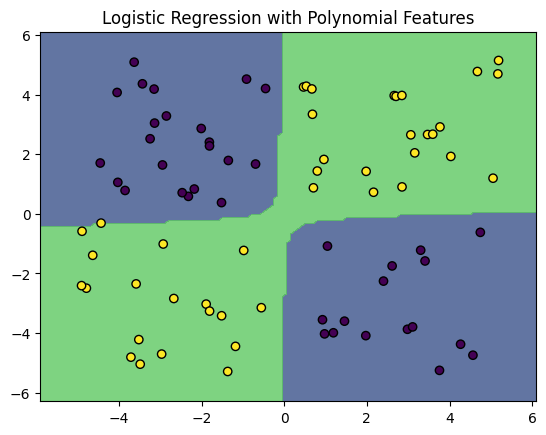

In [14]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Manual polynomial feature expansion
def polynomial_features(X, degree=2):
    poly_features = [X]  # Start with original features

    for d in range(2, degree + 1):
        for i in range(d + 1):
            feature = (X[:, 0]**(d - i)) * (X[:, 1]**i)
            poly_features.append(feature.view(-1, 1))  # Reshape to [240, 1]

    return torch.cat(poly_features, dim=1)  # Concatenate along the second dimension

X_poly_train = polynomial_features(X_train, degree=2)
X_poly_test = polynomial_features(X_test, degree=2)

log_reg = LogisticRegressionModel(X_poly_train.shape[1])
optimizer = optim.SGD(log_reg.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Training Logistic Regression
for epoch in range(200):
    log_reg.train()
    optimizer.zero_grad()
    output = log_reg(X_poly_train).squeeze()
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plot decision boundary for Logistic Regression with polynomial features
plot_decision_boundary(lambda x: log_reg(polynomial_features(x)).squeeze() > 0.5, X_test, y_test, "Logistic Regression with Polynomial Features")


Model: MLP without Regularization
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[38  0]
 [ 0 42]]


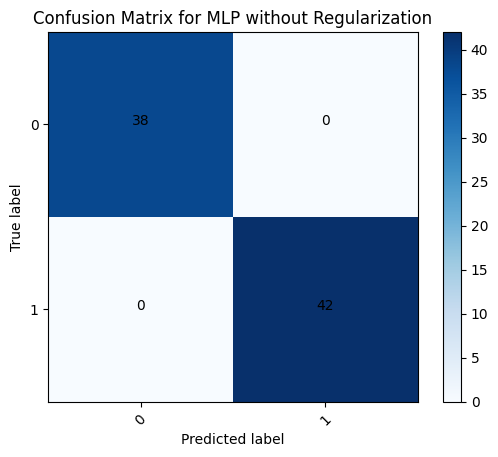


Model: MLP with L1 Regularization
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
Confusion Matrix:
[[38  0]
 [ 1 41]]


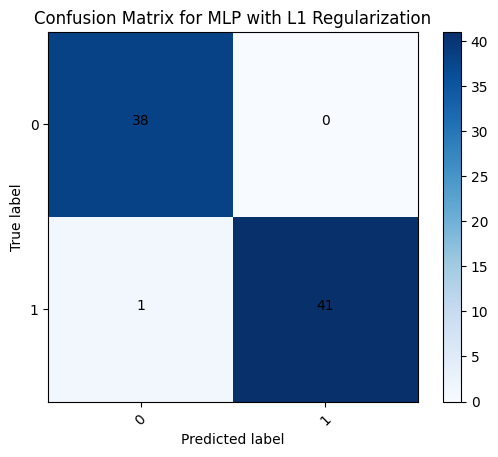


Model: MLP with L2 Regularization
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[38  0]
 [ 0 42]]


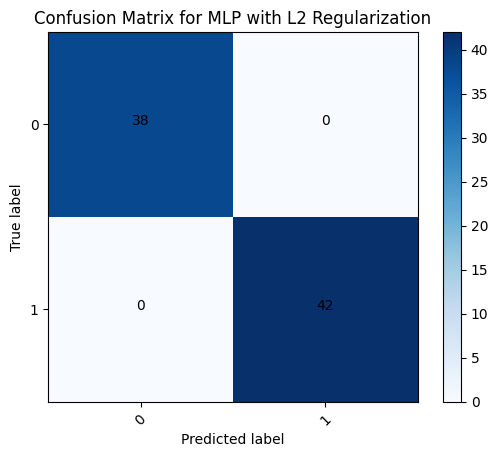


Model: Logistic Regression with Polynomial Features
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
Confusion Matrix:
[[38  0]
 [ 1 41]]


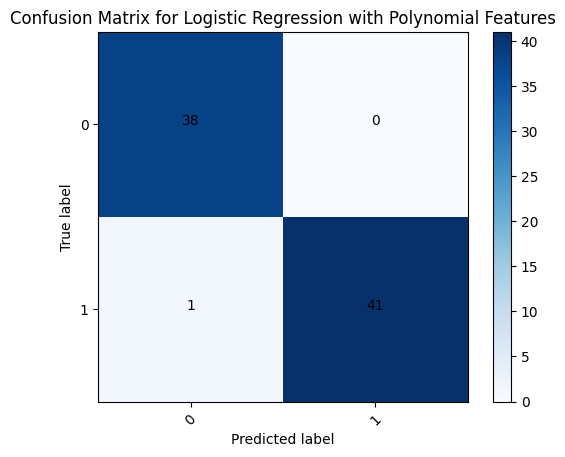

In [17]:
# Function to compute metrics: accuracy, precision, recall, and confusion matrix
# Compute metrics function, updated to handle polynomial features for Logistic Regression
def compute_metrics(model, X, y, poly_features=False):
    model.eval()
    with torch.no_grad():
        # If polynomial features are needed, expand X
        if poly_features:
            X = polynomial_features(X, degree=2)
        
        # Predict
        predictions = (model(X).squeeze() > 0.5).float()
        
        # Calculate confusion matrix components
        tp = ((predictions == 1) & (y == 1)).sum().item()  # True Positive
        tn = ((predictions == 0) & (y == 0)).sum().item()  # True Negative
        fp = ((predictions == 1) & (y == 0)).sum().item()  # False Positive
        fn = ((predictions == 0) & (y == 1)).sum().item()  # False Negative

        # Calculate accuracy, precision, recall
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Create confusion matrix
        confusion_matrix = np.array([[tn, fp], [fn, tp]])

    return accuracy, precision, recall, confusion_matrix


# Function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix, title):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1"], rotation=45)
    plt.yticks(tick_marks, ["0", "1"])

    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    # Adding values to the confusion matrix plot
    for i in range(2):
        for j in range(2):
            plt.text(j, i, f"{confusion_matrix[i, j]}", horizontalalignment="center")

    plt.show()

# Evaluate and print metrics for each model
models = {
    "MLP without Regularization": model_mlp,
    "MLP with L1 Regularization": model_l1,
    "MLP with L2 Regularization": model_l2,
    "Logistic Regression with Polynomial Features": log_reg
}

for name, model in models.items():
    if "Logistic Regression" in name:
        accuracy, precision, recall, confusion_matrix = compute_metrics(model, X_test, y_test, poly_features=True)
    else:
        accuracy, precision, recall, confusion_matrix = compute_metrics(model, X_test, y_test)

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix)
    
    # Plot confusion matrix
    plot_confusion_matrix(confusion_matrix, title=f"Confusion Matrix for {name}")
